In [1]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>



#  Дисперсионный анализ

Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


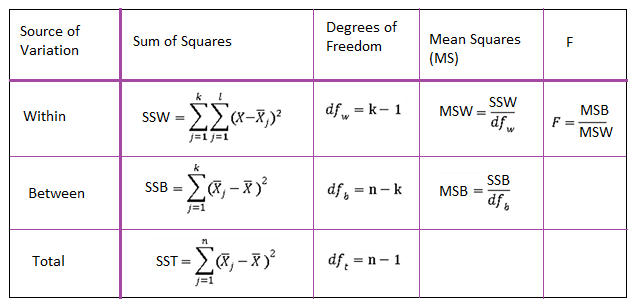

In [2]:
from IPython.display import Image
Image("var_analysis.png")

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 12.0


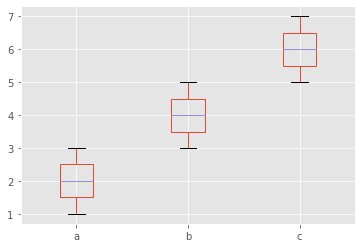

In [3]:
# Выборки которые надо сравнить
data =\
    pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in data.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

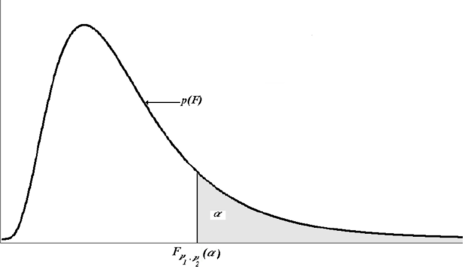

In [4]:
# Распределение F-значения
Image('fisher_dist.png')

Посмотрим, на распределение в нашем случае
- https://gallery.shinyapps.io/dist_calc/ 



<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

Рассмотрим срок службы пошипников производителей A, B, C и D в днях.

* H0: Срок службы подшипников разных производителей не отличается.
* H1: Срок службы подшипников разных производителей отличается.

In [5]:
df =\
    pd.DataFrame([[25, 45, 30, 54],
                  [30, 55, 29, 60],
                  [28, 29, 33, 51],
                  [36, 56, 37, 62],
                  [29, 40, 27, 73]],
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


(array([[3., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 0., 2., 0., 0., 0.],
        [2., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 2., 0., 1.]]),
 array([25. , 29.8, 34.6, 39.4, 44.2, 49. , 53.8, 58.6, 63.4, 68.2, 73. ]),
 <a list of 4 BarContainer objects>)

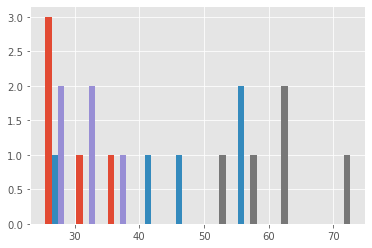

In [6]:
plt.hist(df)

Данные распределены не нормально.

Нулевая гипотеза: A=B=C=D
Альтернативная гипотеза: !(A=B=C=D)
Статистика=17.493, p=0.000026
Отклоняем нулевую гипотезу, срок службы пошипников, вероятно, различается


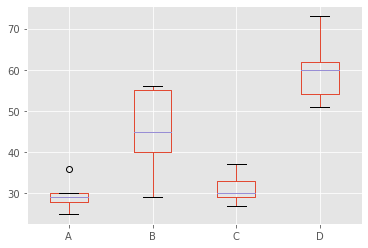

In [7]:
df.boxplot()
print('Нулевая гипотеза:', '='.join(df))
print('Альтернативная гипотеза:', f'!({"=".join(df)})')

fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, срок службы пошипников, вероятно, одинаковый')
else:
    print('Отклоняем нулевую гипотезу, срок службы пошипников, вероятно, различается')

<div class="alert alert-info">
<b>Задача: </b>    
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [8]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976,
             0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

* H0: Размер раковин в разных городах не отличается.
* H1: Размер раковин в разных городах отличается.

Статистика=7.121, p=0.000281
Отклоняем нулевую гипотезу, размер раковин, вероятно, различается


{'whiskers': [<matplotlib.lines.Line2D at 0x20034ccbca0>,
 'caps': [<matplotlib.lines.Line2D at 0x20034cdb280>,
 'boxes': [<matplotlib.lines.Line2D at 0x20034ccb9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x20034cdb820>,
 'fliers': [<matplotlib.lines.Line2D at 0x20034cdbaf0>,
 'means': []}

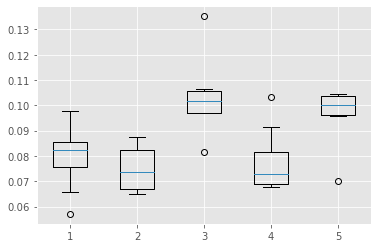

In [9]:
fvalue, pvalue = stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, размер раковин, вероятно, одинаковый')
else:
    print('Отклоняем нулевую гипотезу, размер раковин, вероятно, различается')
plt.boxplot([tillamook, newport, petersburg, magadan, tvarminne])

**petersbur** и **tvarminne** выделяются большим размером раковин.

Статистика=0.501, p=0.612170
Не отклоняем нулевую гипотезу, размер раковин, вероятно, одинаковый


{'whiskers': [<matplotlib.lines.Line2D at 0x20034d90ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x20034d9e4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20034d90be0>,
 'medians': [<matplotlib.lines.Line2D at 0x20034d9ea60>,
 'fliers': [<matplotlib.lines.Line2D at 0x20034d9ed30>,
 'means': []}

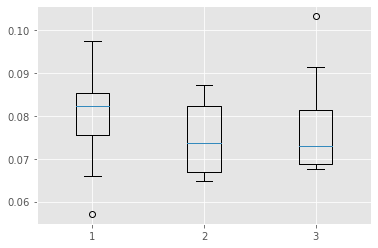

In [10]:
#сравним выборки первой группы
fvalue, pvalue = stats.f_oneway(tillamook, newport, magadan)

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, размер раковин, вероятно, одинаковый')
else:
    print('Отклоняем нулевую гипотезу, размер раковин, вероятно, различается')
plt.boxplot([tillamook, newport, magadan])

Статистика=0.939, p=0.367901
Не отклоняем нулевую гипотезу, размер раковин, вероятно, одинаковый


{'whiskers': [<matplotlib.lines.Line2D at 0x20034e2a190>,
 'caps': [<matplotlib.lines.Line2D at 0x20034e2a730>,
 'boxes': [<matplotlib.lines.Line2D at 0x20034e1ce80>,
 'medians': [<matplotlib.lines.Line2D at 0x20034e2acd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20034e2afa0>,
 'means': []}

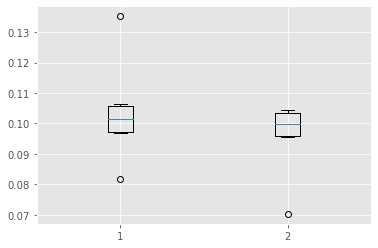

In [11]:
#сравним выборки второй группы
tvalue, pvalue = stats.ttest_ind(petersburg, tvarminne)

print('Статистика=%.3f, p=%.6f' % (tvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, размер раковин, вероятно, одинаковый')
else:
    print('Отклоняем нулевую гипотезу, размер раковин, вероятно, различается')
plt.boxplot([petersburg, tvarminne])

# почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выбрке**

Чтобы выяснить это, сделаем эксперемент.

In [12]:
from numpy import random
from scipy.stats import t

def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2) /
                              N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)

    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    ax.pie(percentage, labels=unique, autopct='%.0f%%')

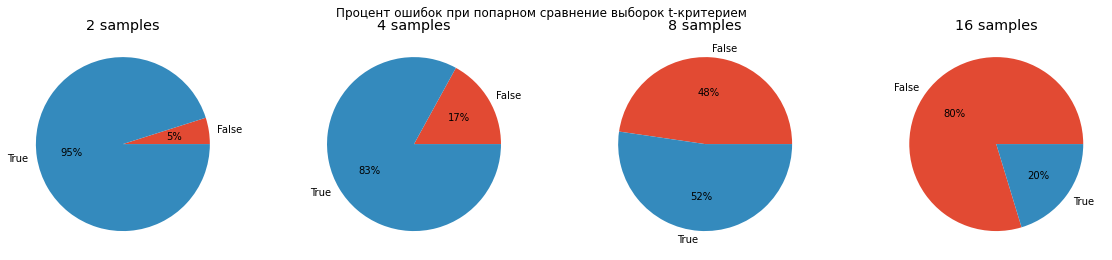

In [13]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 30, ax)
    ax.set_title(f'{n} samples')
    

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

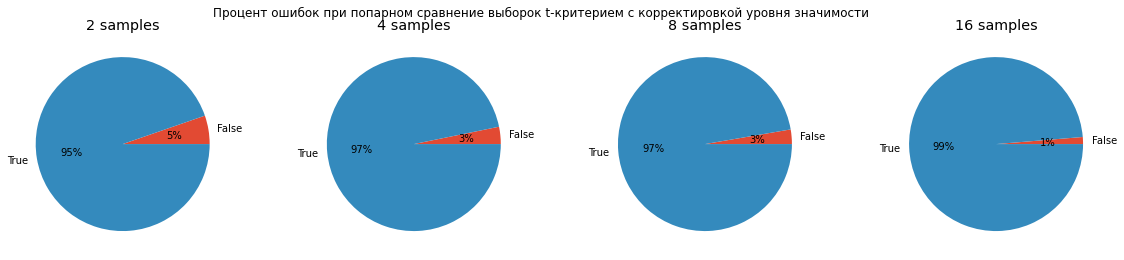

In [14]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием с корректировкой уровня значимости')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2) # делим на число сравнений = ((n*(n-1))/2) - поправка Бонферрони 
    pair_t_test(1000, n, 30, ax, alpha)
    ax.set_title(f'{n} samples')

Однако в данном случае эта будет арх-консервативная корректировавка, которая имеет меньше вероятность найти реальные значения. По сути мы **уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**.


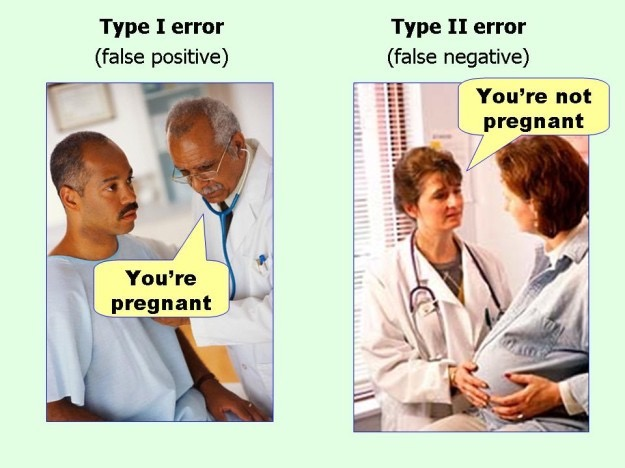

In [15]:
Image('error_types.jpeg')


# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [16]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

t, p = stats.ttest_ind(A, B)
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Статистика=-1.734, p=0.085
Не отклоняем нулевую гипотезу, различий, вероятно, нет


{'whiskers': [<matplotlib.lines.Line2D at 0x20034fc8220>,
 'caps': [<matplotlib.lines.Line2D at 0x20034fc87c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20034c34f10>,
 'medians': [<matplotlib.lines.Line2D at 0x20034fc8d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x20034fd7070>,
 'means': []}

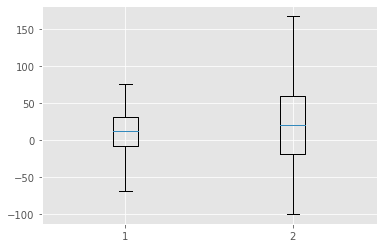

In [17]:
plt.boxplot([A, B])

<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [18]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

t, p = stats.mannwhitneyu(A, B)
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Статистика=4343.000, p=0.109
Не отклоняем нулевую гипотезу, различий, вероятно, нет


{'whiskers': [<matplotlib.lines.Line2D at 0x2003503f880>,
 'caps': [<matplotlib.lines.Line2D at 0x2003503fe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2003503f5b0>,
 'medians': [<matplotlib.lines.Line2D at 0x2003504f400>,
 'fliers': [<matplotlib.lines.Line2D at 0x2003504f6d0>,
 'means': []}

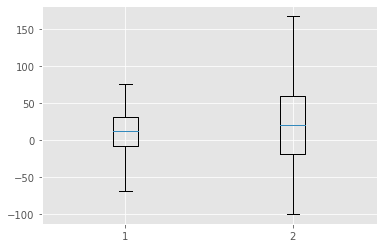

In [19]:
plt.boxplot([A, B])

<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [20]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

fvalue, pvalue = stats.f_oneway(water, nutri, mineral)

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, эффекта, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, эффект, вероятно, имеется')

Статистика=12.526, p=0.000029
Отклоняем нулевую гипотезу, эффект, вероятно, имеется


{'whiskers': [<matplotlib.lines.Line2D at 0x200350bbdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x200350cb3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200350bbb20>,
 'medians': [<matplotlib.lines.Line2D at 0x200350cb970>,
 'fliers': [<matplotlib.lines.Line2D at 0x200350cbc40>,
 'means': []}

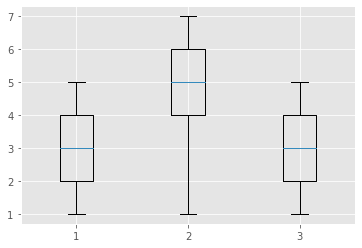

In [21]:
plt.boxplot([water, nutri, mineral])

<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



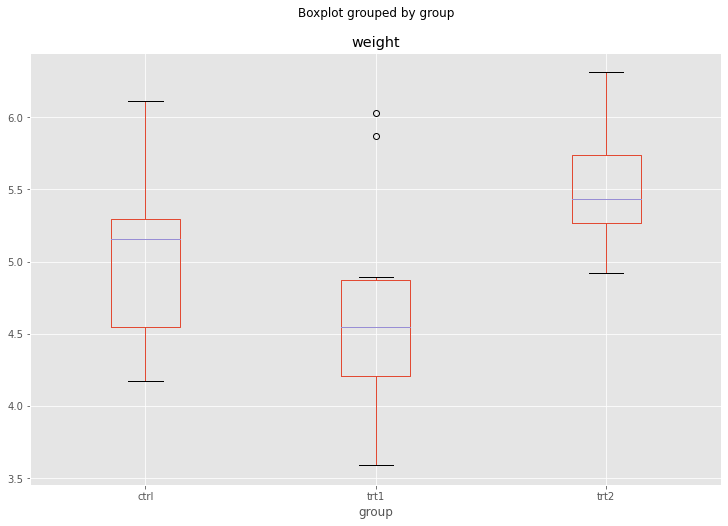

In [22]:
data = pd.read_csv('PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(12, 8));


По графикам мы можем предположить, что первый тип удобрений дает меньшую эффективность, чем в контрольной группе, а второй - большую. Проверим это тестами.

Для начала посмотрим есть ли статистически значимые различия между группами.

In [49]:
fvalue, pvalue = stats.f_oneway(data.weight[data.group == 'ctrl'], data.weight[data.group == 'trt1'], data.weight[data.group == 'trt2'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, различия, вероятно, имеются')

Статистика=4.846, p=0.015910
Отклоняем нулевую гипотезу, различия, вероятно, имеются


In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data.weight,
                          groups=data.group,
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


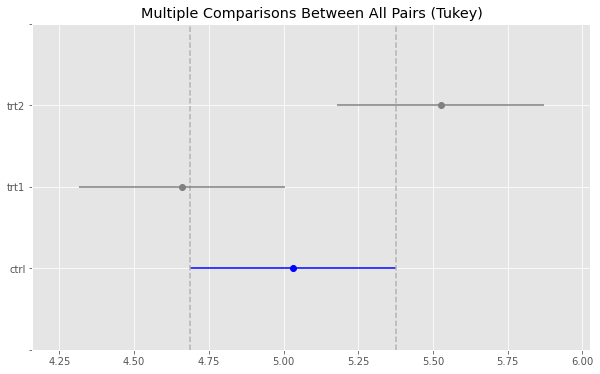

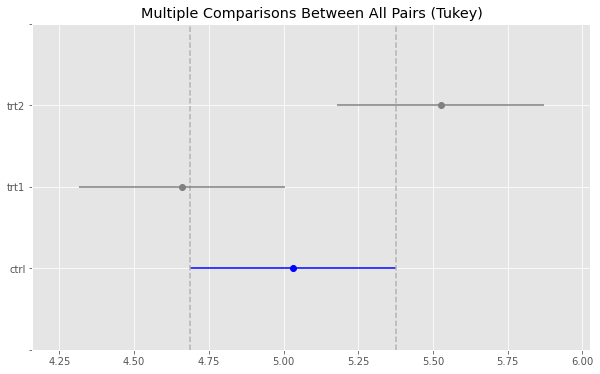

In [52]:
tukey.plot_simultaneous(comparison_name="ctrl")

Результат неоднозначный. Есть статистически значимые различия между группами **tr1** и **tr2**, однако контрольная группа не имеет статистически значимых отличий от этих двух групп.

# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [55]:
data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет
data.head()

C:\Users\fight\AppData\Local\Temp\ipykernel_9272\3106034194.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [56]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [57]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [58]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


По имеющимся данным, в версии с воротами на 30-м уровне игроки, в среднем, чаще возвращаются после 1 и 7 дней игры, а так же выше среднее количество пройденных уровней. 

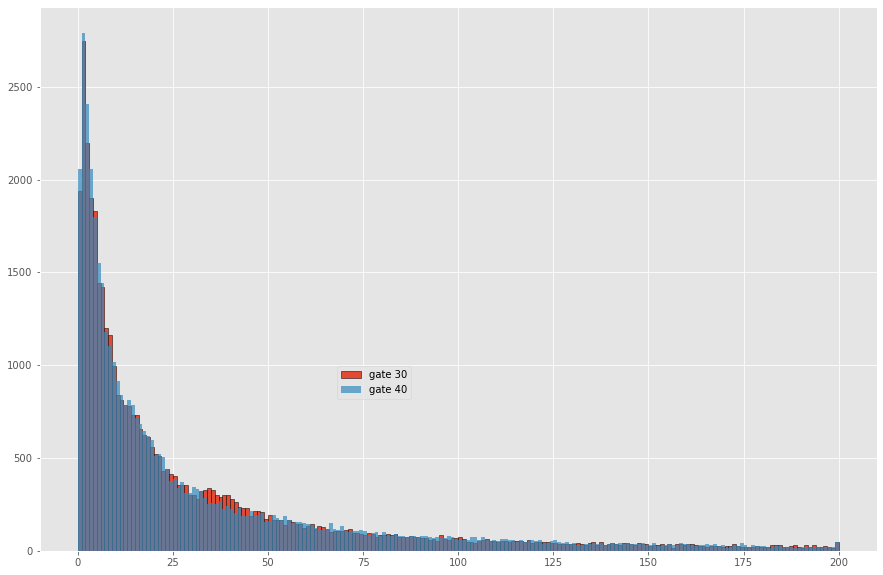

In [59]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

На гистограмме видно большее число пользователей, примерно, между 30-м и 40-м уровнями в версии с воротами на 30-м уровне. Можно предположить, что установка ворот на 30-м урове целесообразнее. Необходимо подтвердить это тестами.

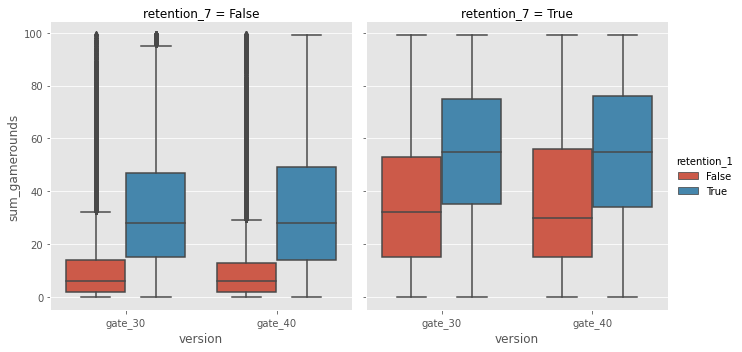

In [60]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [104]:
from scipy.stats import f_oneway

# Ваш код.
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'],
                data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Статистика=%.3f, p=%.3f' % (f, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=0.794, p=0.373
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


<div class="alert alert-info">
<b>Задание: Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот. </b>
</div>


In [103]:
stat, p = f_oneway(data[data['version'] == 'gate_30']['retention_1'],
                data[data['version'] == 'gate_40']['retention_1'])
print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=3.183, p=0.074
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [105]:
stat, p = f_oneway(data[data['version'] == 'gate_30']['retention_7'],
                data[data['version'] == 'gate_40']['retention_7'])
print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=10.014, p=0.002
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


**Ваши выводы?** 

По количеству пройденных уровней, статистически значимых различий
между выборками нет.

По количеству вернувшихся через 1 день игроков, статистически значимых различий между выборками нет. 

Имеются статистически значимые различия по количеству вернувшихся через 7 дней игроков. Целесообразно установить ворота на уровне 30.

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

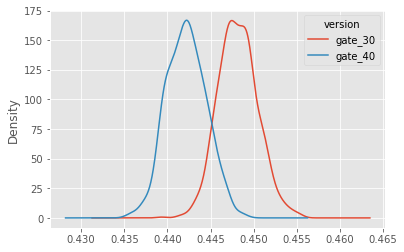

In [106]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_1'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

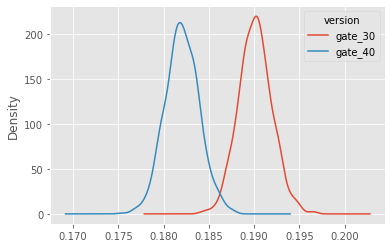

In [107]:
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
boot_7d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()
    boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_7d.plot(kind='density')

In [108]:
# сделайте выводы, используя t-тест для retention_1 и retention_7
t, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Статистика=58.286, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть


Имеются статистически значимые различия по количеству вернувшихся через 1 день игроков.

In [109]:
t, p = stats.ttest_ind(boot_7d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Статистика=-2706.984, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть


Имеются статистически значимые различия по количеству вернувшихся через 7 дней игроков. Целесообразно установить ворота на уровне 30.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [111]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

C:\Users\fight\AppData\Local\Temp\ipykernel_9272\354238790.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [123]:
grass = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock') | (pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock')]
rock = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass') | (pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass')]

g_a, r_a = grass.Attack.mean(), rock.Attack.mean()
print('Средняя атака типа grass=%.3f, Средняя атака типа rock=%.3f' % (g_a, r_a))
t, p = stats.ttest_ind(grass.Attack, rock.Attack)
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Средняя атака типа grass=73.731, Средняя атака типа rock=91.786
Статистика=-3.729, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть


Профессор Оук не прав. Покемоны класса rock имеют более сильную обычную атаку.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [124]:
water = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal') | (pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal')]
normal = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water') | (pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water')]

w_s, n_s = water.Speed.mean(), normal.Speed.mean()
print('Средняя скорость типа water=%.3f, Средняя скорость типа normal=%.3f' % (w_s, n_s))
t, p = stats.ttest_ind(water.Speed, normal.Speed)
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Средняя скорость типа water=64.936, Средняя скорость типа normal=72.257
Статистика=-2.151, p=0.033
Отклоняем нулевую гипотезу, вероятно, различия есть


Профессор Оук не прав. Покемоны класса normal имеют большую скорость.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [140]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']
treathed = pd.DataFrame()
for name in treathed_pokemon:
    treathed = treathed.append(pokemon[pokemon['Name'] == name], ignore_index = True)

treathed_speed, normal_speed = treathed.Speed.mean(), pokemon.Speed.mean()
print('Средняя скорость усиленных покемонов=%.3f, Средняя скорость обычных покемонов=%.3f' % (treathed_speed, normal_speed))
t, p = stats.ttest_ind(treathed.Speed, pokemon.Speed)
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Средняя скорость усиленных покемонов=145.000, Средняя скорость обычных покемонов=68.278
Статистика=5.276, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть


C:\Users\fight\AppData\Local\Temp\ipykernel_9272\1374630835.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  treathed = treathed.append(pokemon[pokemon['Name'] == name], ignore_index = True)


Профессор Оук прав. Усиленные покемоны имеют большую скорость.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [142]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']
treathed = pd.DataFrame()
for name in treathed_pokemon:
    treathed = treathed.append(pokemon[pokemon['Name'] == name], ignore_index = True)

treathed_speed, normal_speed = treathed.Speed.mean(), pokemon.Speed.mean()
print('Средняя скорость усиленных покемонов=%.3f, Средняя скорость обычных покемонов=%.3f' % (treathed_speed, normal_speed))
t, p = stats.ttest_ind(treathed.Speed, pokemon.Speed)
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Средняя скорость усиленных покемонов=145.000, Средняя скорость обычных покемонов=68.278
Статистика=5.276, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть


C:\Users\fight\AppData\Local\Temp\ipykernel_9272\1374630835.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  treathed = treathed.append(pokemon[pokemon['Name'] == name], ignore_index = True)


Профессор Оук прав. Усиленные покемоны имеют большую скорость.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [179]:
leg = pokemon[pokemon['Legendary']]
not_leg = pokemon[pokemon['Legendary']==False]
leg['sum_leg'] = leg['HP'] + leg['Attack'] + leg['Defense']
leg['product_leg'] = leg['HP'] * leg['Attack'] * leg['Defense']
not_leg['sum_normal'] = not_leg['HP'] + not_leg['Attack'] + not_leg['Defense']
not_leg['product_normal'] = not_leg['HP'] * not_leg['Attack'] * not_leg['Defense']

print('Проверим, различается ли сумма \n')

leg_sum, normal_sum = leg['sum_leg'].mean(), not_leg['sum_normal'].mean()
print('Средняя сумма HP,Attack,Defense легендарных покемонов=%.3f, \
Средняя сумма HP,Attack,Defense обычных покемонов=%.3f' % (leg_sum, normal_sum))
t, p = stats.ttest_ind(leg['sum_leg'], not_leg['sum_normal'])
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')
       
print('\n Проверим, различается ли произведение \n')
leg_prod, normal_prod = leg['product_leg'].mean(), not_leg['product_normal'].mean()
print('Среднее произведение HP,Attack,Defense легендарных покемонов=%.3f, \
Среднее произведение HP,Attack,Defense обычных покемонов=%.3f' % (leg_prod, normal_prod))
t, p = stats.ttest_ind(leg['product_leg'], not_leg['product_normal'])
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Проверим, различается ли сумма 

Средняя сумма HP,Attack,Defense легендарных покемонов=309.077, Средняя сумма HP,Attack,Defense обычных покемонов=214.411
Статистика=11.592, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть

 Проверим, различается ли произведение 

Среднее произведение HP,Attack,Defense легендарных покемонов=1085941.615, Среднее произведение HP,Attack,Defense обычных покемонов=425041.389
Статистика=13.263, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть


C:\Users\fight\AppData\Local\Temp\ipykernel_9272\2462327651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leg['sum_leg'] = leg['HP'] + leg['Attack'] + leg['Defense']
C:\Users\fight\AppData\Local\Temp\ipykernel_9272\2462327651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leg['product_leg'] = leg['HP'] * leg['Attack'] * leg['Defense']
C:\Users\fight\AppData\Local\Temp\ipykernel_9272\2462327651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Легендарные покемоны действительно сильнее обычных.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [180]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [194]:
bdc = pd.DataFrame()
for class_ in best_defence_class:
    bdc = bdc.append(pokemon[(pokemon['Class 1'] == class_)])
                     
tukey = pairwise_tukeyhsd(endog=bdc.Defense,
                          groups=bdc['Class 1'],
                          alpha=0.05)
print(tukey)

C:\Users\fight\AppData\Local\Temp\ipykernel_9272\3471911808.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bdc = bdc.append(pokemon[(pokemon['Class 1'] == class_)])
C:\Users\fight\AppData\Local\Temp\ipykernel_9272\3471911808.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bdc = bdc.append(pokemon[(pokemon['Class 1'] == class_)])
C:\Users\fight\AppData\Local\Temp\ipykernel_9272\3471911808.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bdc = bdc.append(pokemon[(pokemon['Class 1'] == class_)])
C:\Users\fight\AppData\Local\Temp\ipykernel_9272\3471911808.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bdc = bdc.append(pokem

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice -13.4271 0.5457 -39.7195 12.8653  False
Ground   Rock  15.9517 0.2613  -6.6698 38.5733  False
Ground  Steel  41.5266 0.0002  16.0826 66.9707   True
   Ice   Rock  29.3788 0.0128   4.6707 54.0869   True
   Ice  Steel  54.9537    0.0  27.6379 82.2695   True
  Rock  Steel  25.5749   0.03   1.7716 49.3783   True
-----------------------------------------------------


Профессор Оук не прав. Имеются 4 пары классов со статистически значимыми различиями силы обычной защиты.